In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = None
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore')

## Airline Passenger Satisfaction
**What factors lead to customer satisfaction for an Airline?**  
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

### Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

### Content
*Gender*: Gender of the passengers (Female, Male)  
*Customer Type*: The customer type (Loyal customer, disloyal customer)  
*Age*: The actual age of the passengers  
*Type of Travel*: Purpose of the flight of the passengers (Personal Travel, Business Travel)  
*Class*: Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
*Flight distance*: The flight distance of this journey  
*Inflight wifi service*: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
*Departure/Arrival time convenient*: Satisfaction level of Departure/Arrival time convenient  
*Ease of Online booking*: Satisfaction level of online booking  
*Gate location*: Satisfaction level of Gate location  
*Food and drink*: Satisfaction level of Food and drink  
*Online boarding*: Satisfaction level of online boarding  
*Seat comfort*: Satisfaction level of Seat comfort  
*Inflight entertainment*: Satisfaction level of inflight entertainment  
*On-board service*: Satisfaction level of On-board service  
*Leg room service*: Satisfaction level of Leg room service  
*Baggage handling*: Satisfaction level of baggage handling  
*Check-in service*: Satisfaction level of Check-in service  
*Inflight service*: Satisfaction level of inflight service  
*Cleanliness*: Satisfaction level of Cleanliness  
*Departure Delay in Minutes*: Minutes delayed when departure  
*Arrival Delay in Minutes*: Minutes delayed when Arrival  
*Satisfaction*: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
train_df = pd.read_csv("./datasets/train.csv", index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [5]:
train_df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
# Пропущенные значения
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполняю пропущенные значения признака "Arrival Delay in Minutes" модой

In [8]:
arrival_delay_mode = train_df['Arrival Delay in Minutes'].mode()[0]
train_df.loc[train_df['Arrival Delay in Minutes'].isnull(), 
             'Arrival Delay in Minutes'] = arrival_delay_mode

In [9]:
train_df['Arrival Delay in Minutes'].isna().value_counts()

False    103904
Name: Arrival Delay in Minutes, dtype: int64

Заменяю значения целевой переменно на 0 и 1

In [10]:
train_df.satisfaction = np.where(train_df.satisfaction == 'satisfied', 1, 0)
train_df.satisfaction.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [11]:
for col in train_df.columns[1:]:
    print(f'{col}\n{train_df[col].value_counts()}')
    print('*' * 30)

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
******************************
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
******************************
Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
******************************
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
******************************
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
******************************
Flight Distance
337     660
594     395
404     392
2475    369
862     369
       ... 
1466      1
856       1
810       1
1361      1
3763      1
Name: Flight Distance, Length: 3802, dtype: int64
******************************
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Infligh

In [12]:
cont_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
                'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
target = ['satisfaction']

<AxesSubplot:>

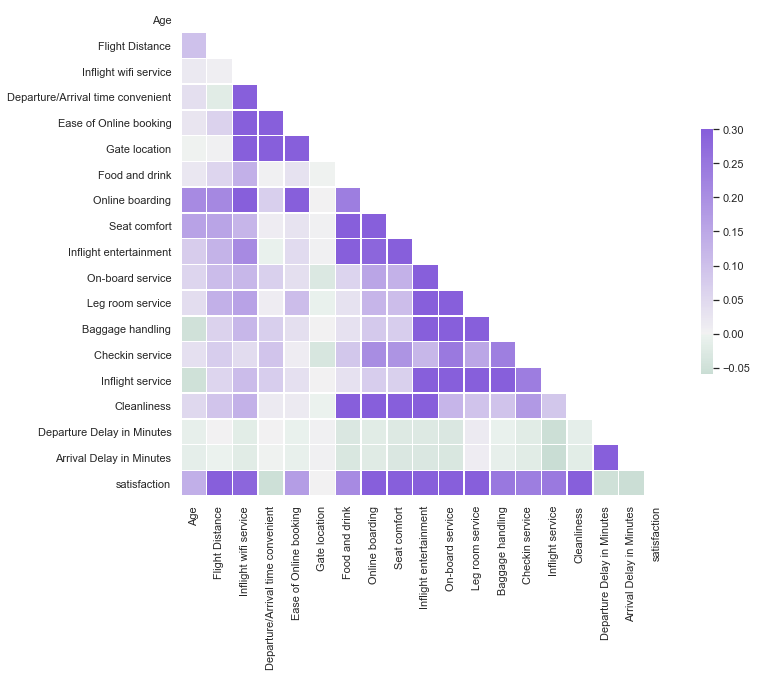

In [13]:
# Compute the correlation matrix
df_corr = train_df.iloc[:, 1:].corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df_corr.satisfaction.sort_values()

Arrival Delay in Minutes            -0.057435
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.050494
Gate location                        0.000682
Age                                  0.137167
Ease of Online booking               0.171705
Food and drink                       0.209936
Checkin service                      0.236174
Inflight service                     0.244741
Baggage handling                     0.247749
Inflight wifi service                0.284245
Flight Distance                      0.298780
Cleanliness                          0.305198
Leg room service                     0.313131
On-board service                     0.322383
Seat comfort                         0.349459
Inflight entertainment               0.398059
Online boarding                      0.503557
satisfaction                         1.000000
Name: satisfaction, dtype: float64

In [15]:
cat_features.remove('Gate location')
cat_features.remove('Departure/Arrival time convenient')

In [16]:
features_to_drop = ['satisfaction', 'id', 'Gate location', 'Departure/Arrival time convenient',
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']

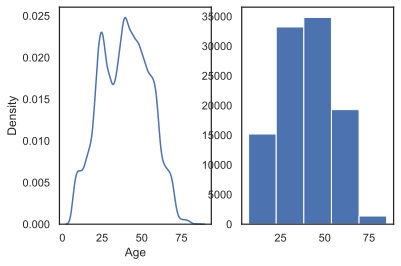

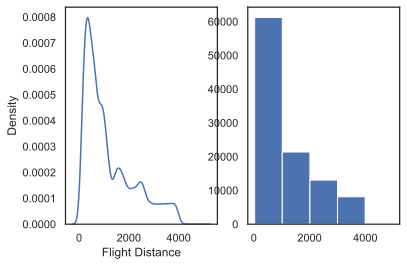

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

for column in cont_features[:2]:
    plt.subplot(1,2,1)
    sns.kdeplot(train_df[column])
    plt.subplot(1,2,2)
    plt.hist(train_df[column], bins=5)
    plt.show()

In [18]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

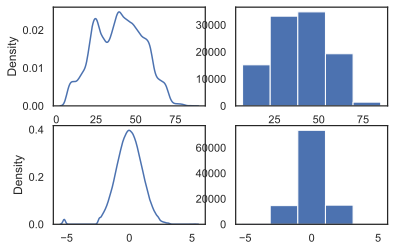

In [19]:
dq =qt.fit_transform(train_df['Age'].values.reshape(-1,1))
plt.subplot(2,2,1)
sns.kdeplot(train_df['Age'].values)
plt.subplot(2,2,2)
plt.hist(train_df['Age'], bins=5)
plt.subplot(2,2,3)
sns.kdeplot(dq[:,0])
plt.subplot(2,2,4)
plt.hist(dq, bins=5)
plt.show()

In [20]:
train_df['Age'] = qt.fit_transform(train_df['Age'].values.reshape(-1,1))

In [21]:
# Добавляю дамми переменные
train_df = pd.get_dummies(data=train_df, columns=cat_features)
train_df.head()

,id,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,70172,-1.744448,460,4,1,25,18.0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,5047,-0.826698,235,2,3,1,6.0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,110028,-0.743040,1142,2,2,0,0.0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,24026,-0.826698,562,5,5,11,9.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,119299,1.460531,214,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [22]:
# Стандартизирую признаки "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"
from sklearn.preprocessing import StandardScaler

In [23]:
standard = StandardScaler()

In [25]:
std_cols = standard.fit_transform(train_df[[cont_features[1]]])
std_cols[0]

array([-0.73153876])

In [26]:
train_df['Flight Distance'] = std_cols[:, 0]
train_df.head()

,id,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,70172,-1.744448,-0.731539,4,1,25,18.0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,5047,-0.826698,-0.957184,2,3,1,6.0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,110028,-0.743040,-0.047584,2,2,0,0.0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,24026,-0.826698,-0.629246,5,5,11,9.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,119299,1.460531,-0.978244,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [27]:
X = train_df.drop(features_to_drop, axis=1)
y = train_df[target]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True)

In [30]:
X_train.head()

,Age,Flight Distance,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
67054,-1.004131,-0.792714,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
94691,0.196979,-0.848874,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
100023,-1.004131,-0.952169,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
54087,-5.199338,-0.800736,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
13759,1.100140,0.358576,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [31]:
X_train.shape

(72732, 82)

Произвожу подбор гиперпараметров 

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [33]:
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=27)

In [34]:
params={'n_estimators':[100, 150, 200, 250],
        'learning_rate':[0.1, 0.05, 0.01],
        'max_depth':[3, 5, 7, 10]
        }

In [35]:
%%time
grid = GridSearchCV(xgb_cls,
                    param_grid=params,
                    cv=5,
                    refit=False)

search = grid.fit(X_train, y_train)

Wall time: 18min 48s


In [36]:
search.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250}

In [37]:
search.best_score_

0.9619012420670027

In [38]:
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=27,
            learning_rate=0.05, max_depth=10, n_estimators=250)

In [39]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=12,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
valid_preds = xgb_cls.predict(X_valid)

In [41]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [42]:
print(f'Valid roc_auc_score: {roc_auc_score(y_valid, valid_preds)}')

Valid roc_auc_score: 0.9605710032881207


In [43]:
valid_proba = xgb_cls.predict_proba(X_valid)[:, 1]
valid_proba[:10]

array([0.9996592 , 0.6585375 , 0.9998399 , 0.00118697, 0.9781436 ,
       0.03705091, 0.29413077, 0.00034507, 0.99958724, 0.00057589],
      dtype=float32)

In [44]:
precision, recall, thresholds = precision_recall_curve(y_valid, valid_proba)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.565398, F-Score=0.957, Precision=0.980, Recall=0.935


In [45]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17488   255]
 [  873 12556]]


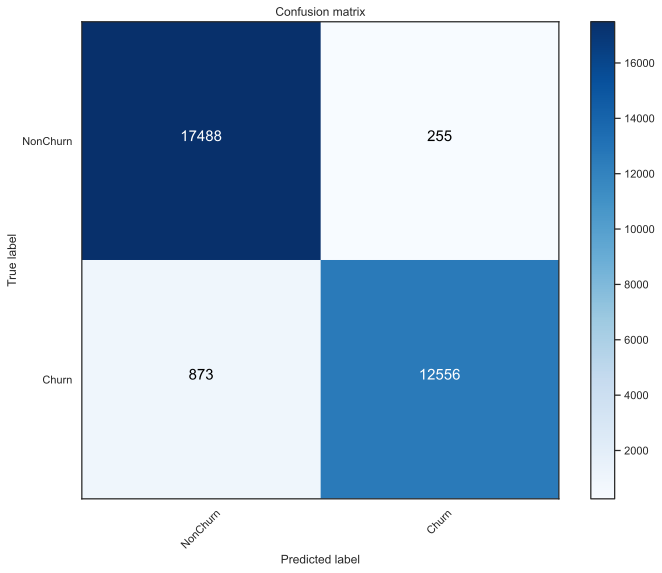

In [46]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_valid, valid_proba>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [47]:
xgb_coefs = pd.DataFrame(xgb_cls.feature_importances_, 
                        X_train.columns.to_list(), 
                        columns=['coefficient'])
xgb_coefs.head()

,coefficient
Age,0.002259
Flight Distance,0.001097
Gender_Female,0.000835
Gender_Male,0.000000
Customer Type_Loyal Customer,0.018587


In [48]:
xgb_coefs.sort_values(by='coefficient', ascending=False).head(25)

,coefficient
Class_Business,0.207098
Online boarding_5,0.150912
Inflight wifi service_5,0.134264
Online boarding_4,0.089792
Inflight wifi service_0,0.073473
Inflight wifi service_4,0.044369
Type of Travel_Business travel,0.031283
Seat comfort_3,0.021538
Customer Type_Loyal Customer,0.018587
Inflight entertainment_4,0.013053


In [49]:
xgb_coefs.loc[xgb_coefs.coefficient == 0]

,coefficient
Gender_Male,0.0
Customer Type_disloyal Customer,0.0
Type of Travel_Personal Travel,0.0
Seat comfort_0,0.0
On-board service_0,0.0
Checkin service_0,0.0
Inflight service_0,0.0
Cleanliness_0,0.0


In [50]:
xgb_coefs.shape

(82, 1)

In [51]:
from sklearn.feature_selection import SelectKBest

In [52]:
kbest = SelectKBest(k=30)

In [53]:
kbest.fit(X_train, y_train)

SelectKBest(k=30)

In [54]:
X_train_new = kbest.transform(X_train)

In [55]:
X_train_new.shape

(72732, 30)

In [56]:
xgb_cls.fit(X_train_new, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=12,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [57]:
X_valid_new = kbest.transform(X_valid)

In [58]:
valid_preds_new = xgb_cls.predict(X_valid_new)

In [59]:
roc_auc_score(y_valid, valid_preds_new)

0.9498605025987517